In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Set Random Seed
seed = np.random.seed(123)

# Credit Card Fraud Detection
1. Objective 
2. Dataset
3. Project Pipeline
4. Pre-processing
5. Training models
6. Evaluation

## 1. Objective
### Credit Card Fraud 
- Credit card fraud is the unauthorized use of a credit card to make purchases or withdraw funds.
### Source 
- The dataset contains transactions made by credit cards in September 2013 by European cardholders, and also available in Kaggle.
### Objective
- to detect fraudulent credit card transactions or not based on synthetic features

## 2. Dataset
- It contains only numerical input variables which are the result of a PCA transformation. 
- There are a total of 31 features in the dataset.
    - `V1, V2, … V28` are the principal components obtained with PCA
    - `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
    - `Amount` is the transaction Amount
    - Target: `Class` 1 in case of fraud and 0 otherwise.

In [2]:
## Load the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## 3. Project Pipeline
1. Import and understand the fraud data
2. See if the data has any shortcomings like missing data or imbalance, and then fix them
3. Train models on the data using K-Fold Cross Validation
4. Evaluate the performance of the models using various metrics
5. Rank the model based on their performance and visualize the results

## 4. Pre-processing
- No missing data
- Data Imbalance 
    - Only 492 (or 0.172%) of transaction are fraudulent. That means the datta is highy unbalanced with respect with target variable `Class`.
### Dealing with data imbalance
- `SMOTE` : Oversampling
- `Hybrid Approach` :Undersampling and Oversampling

In [4]:
#
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64

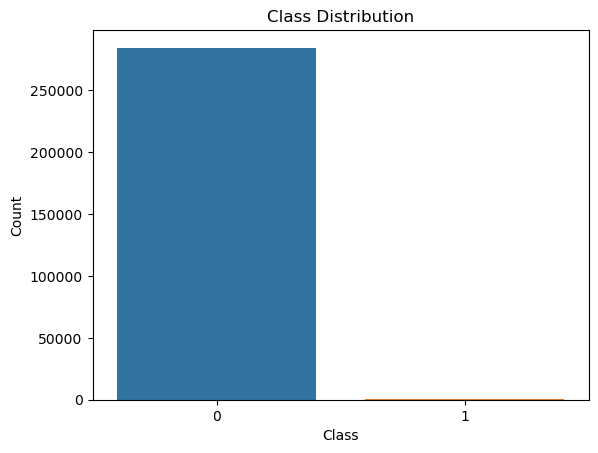

In [5]:
# Create the Bar Plot to show the 'class' distribution
sns.barplot(x = class_counts.index, y = class_counts.values);
plt.title('Class Distribution');
plt.xlabel('Class');
plt.ylabel('Count');

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.188326e-16,-1.164018e-15,-9.082889e-16,2.085924e-17,-6.343731e-16,-1.018099e-15,-2.557889e-16,-1.347621e-16,...,-2.444306e-16,-4.201199e-16,6.217312e-16,-4.385333e-17,-9.832396e-16,-1.745526e-17,1.196577e-16,2.108702e-15,-0.227709,-0.101347
V2,-0.010593,4.188326e-16,1.000000e+00,3.140164e-16,-1.125909e-15,5.230686e-16,2.781752e-16,1.857398e-16,-5.698764e-17,2.006267e-17,...,-8.277282e-17,1.547272e-16,1.668081e-16,1.577058e-17,-4.530958e-16,1.984817e-16,-4.938067e-16,-5.182198e-16,-0.531409,0.091289
V3,-0.419618,-1.164018e-15,3.140164e-16,1.000000e+00,4.644369e-16,-5.483554e-17,1.627805e-15,5.239200e-16,-1.297365e-15,5.725902e-16,...,5.931009e-17,-1.115726e-15,-5.063673e-16,5.605700e-19,-1.118857e-15,-1.389572e-16,1.058098e-15,9.792787e-16,-0.210880,-0.192961
V4,-0.105260,-9.082889e-16,-1.125909e-15,4.644369e-16,1.000000e+00,-1.722056e-15,-7.565957e-16,-4.188169e-16,5.645256e-16,6.873528e-16,...,-1.862123e-16,-3.949686e-17,9.564529e-17,1.569977e-16,6.026069e-16,-4.237973e-16,4.577343e-17,-3.888959e-18,0.098732,0.133447
V5,0.173072,2.085924e-17,5.230686e-16,-5.483554e-17,-1.722056e-15,1.000000e+00,2.208263e-16,2.691713e-16,7.396815e-16,7.178142e-16,...,-3.990893e-16,1.277735e-16,-8.760100e-18,-1.142295e-15,5.021165e-16,4.450164e-16,6.538203e-16,-3.301835e-18,-0.386356,-0.094974
V6,-0.063016,-6.343731e-16,2.781752e-16,1.627805e-15,-7.565957e-16,2.208263e-16,1.000000e+00,1.213776e-16,-1.030439e-16,4.234240e-16,...,5.551919e-17,5.756004e-18,9.443837e-17,-1.070899e-15,4.568884e-16,-1.402561e-16,-4.500879e-16,2.493919e-16,0.215981,-0.043643
V7,0.084714,-1.018099e-15,1.857398e-16,5.239200e-16,-4.188169e-16,2.691713e-16,1.213776e-16,1.000000e+00,3.549393e-16,1.125386e-15,...,-2.122235e-16,-8.840620e-16,-4.458969e-16,9.812896e-18,-2.881866e-16,-9.494990e-16,-1.723845e-15,-2.921030e-16,0.397311,-0.187257
V8,-0.036949,-2.557889e-16,-5.698764e-17,-1.297365e-15,5.645256e-16,7.396815e-16,-1.030439e-16,3.549393e-16,1.000000e+00,4.340695e-16,...,3.830431e-16,2.065947e-16,6.910016e-17,-9.701203e-17,-4.609097e-16,-1.777597e-16,1.280491e-16,-6.187506e-16,-0.103079,0.019875
V9,-0.008660,-1.347621e-16,2.006267e-17,5.725902e-16,6.873528e-16,7.178142e-16,4.234240e-16,1.125386e-15,4.340695e-16,1.000000e+00,...,1.874693e-16,-6.976879e-16,-5.221067e-16,-1.449529e-16,6.679328e-16,-8.154251e-16,-6.111140e-17,1.106537e-15,-0.044246,-0.097733


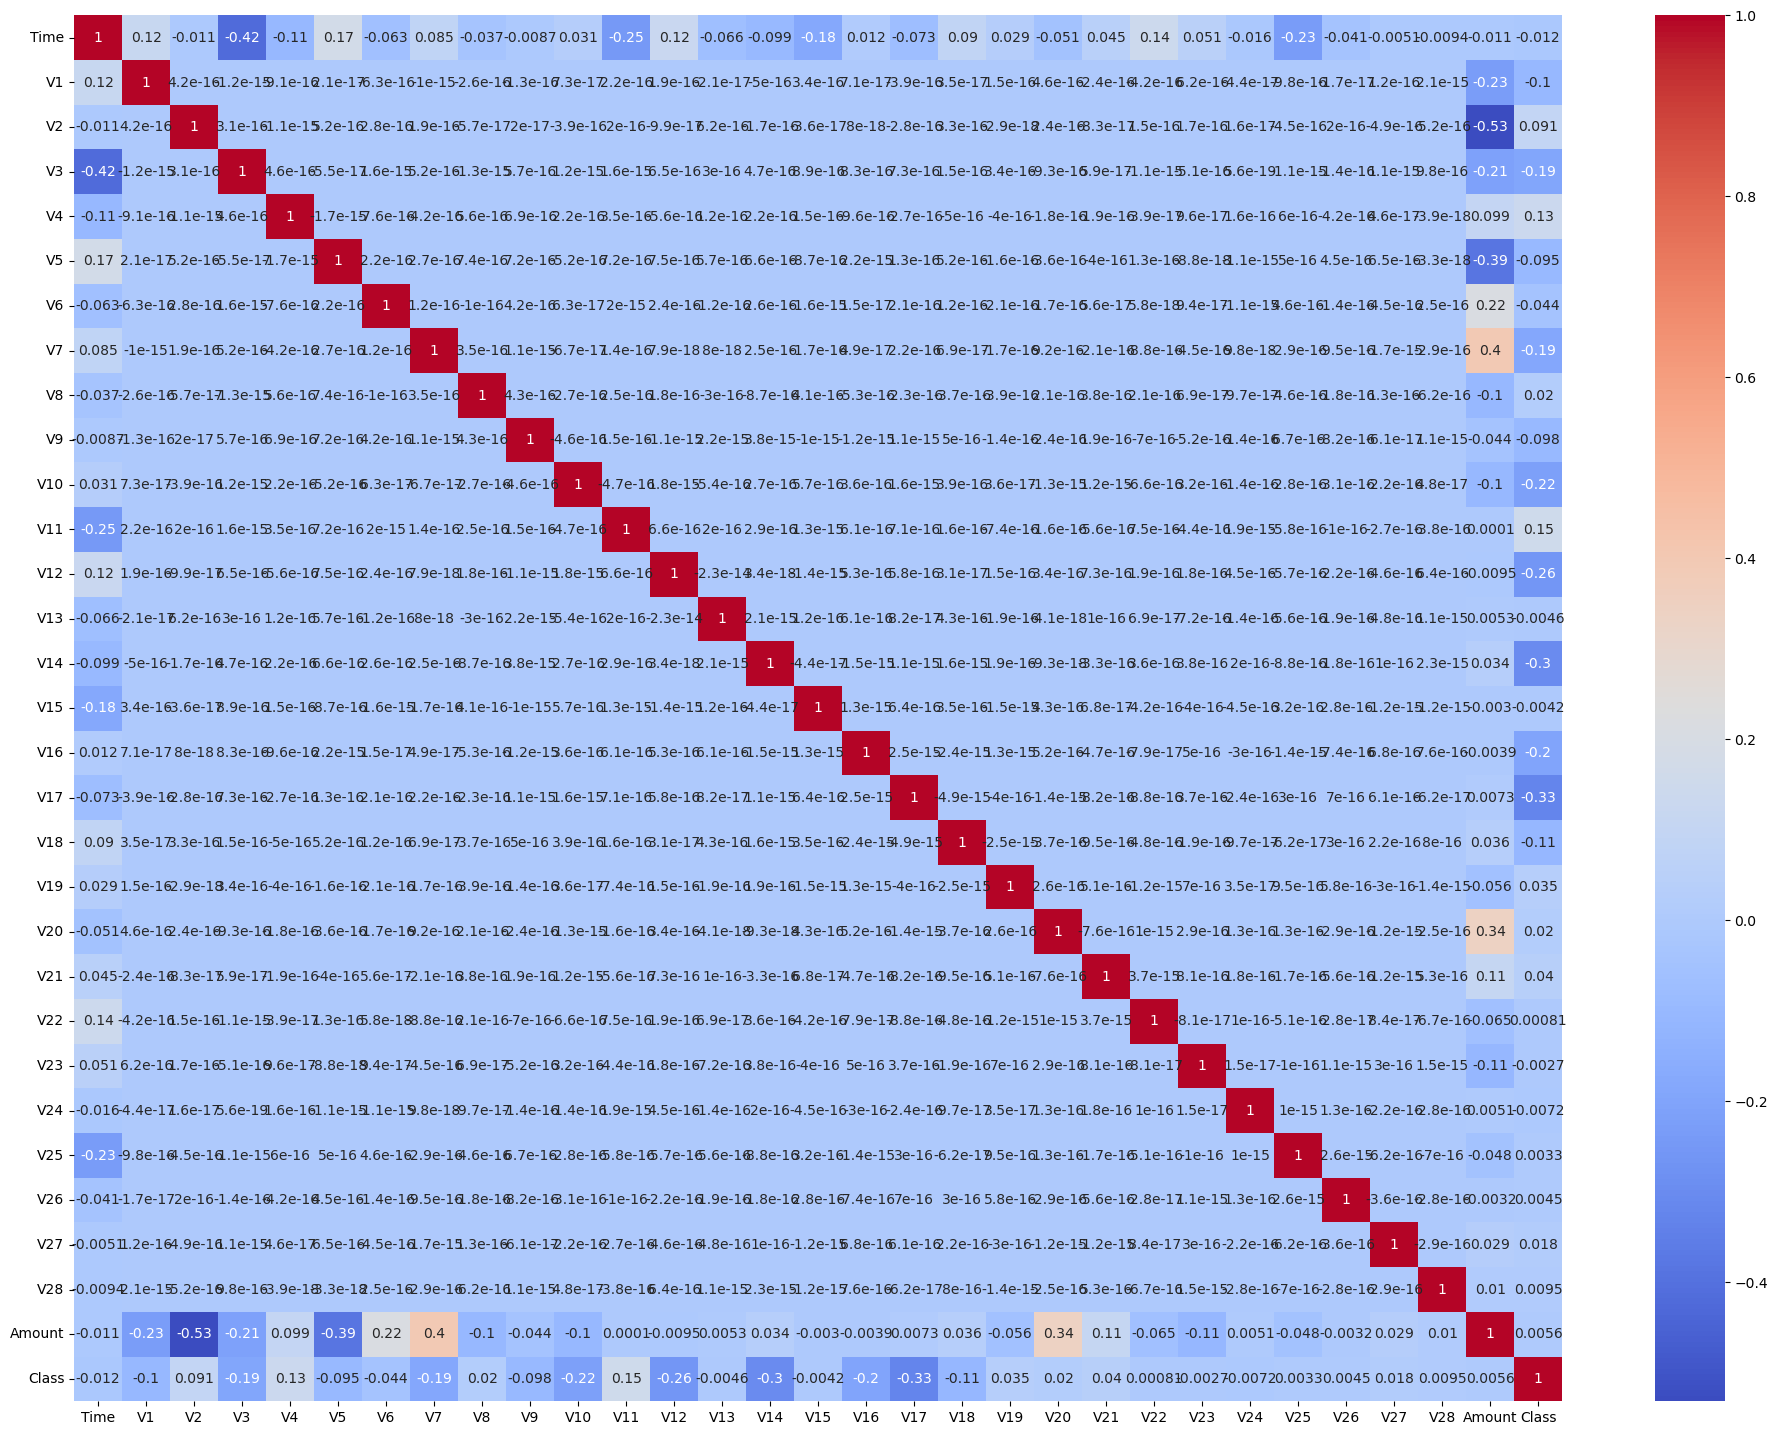

In [9]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);

## Freature Engineering
As `time` is given in relative fashion, we are using pandas **timedelta** which represents a duration, the difference between 2 time a day

In [10]:
df2 = df.copy()
Delta_Time = pd.to_timedelta(df2['Time'], unit='s')
# Create derived columns 'Min' and 'Hour'
df2['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df2['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df2['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [11]:
# Drop unnessary columns: 'Time', as I've derived 'Day', 'Hour', 'Minute' from the time column
df2.drop('Time', axis=1, inplace=True)
# We will keep only 'Time_Hour', as 'Day and Min' might not be very useful
df2.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23


## Splitting the data into train & test data

In [12]:
# splitting the dataset into 'X' and 'y'
y = df2['Class']
X = df2.drop(['Class'], axis=1)
# Check 'X'
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.20)

### Plotting the distribution of 'Class' for each variable
- It helps us to understand whether the skewness in the data

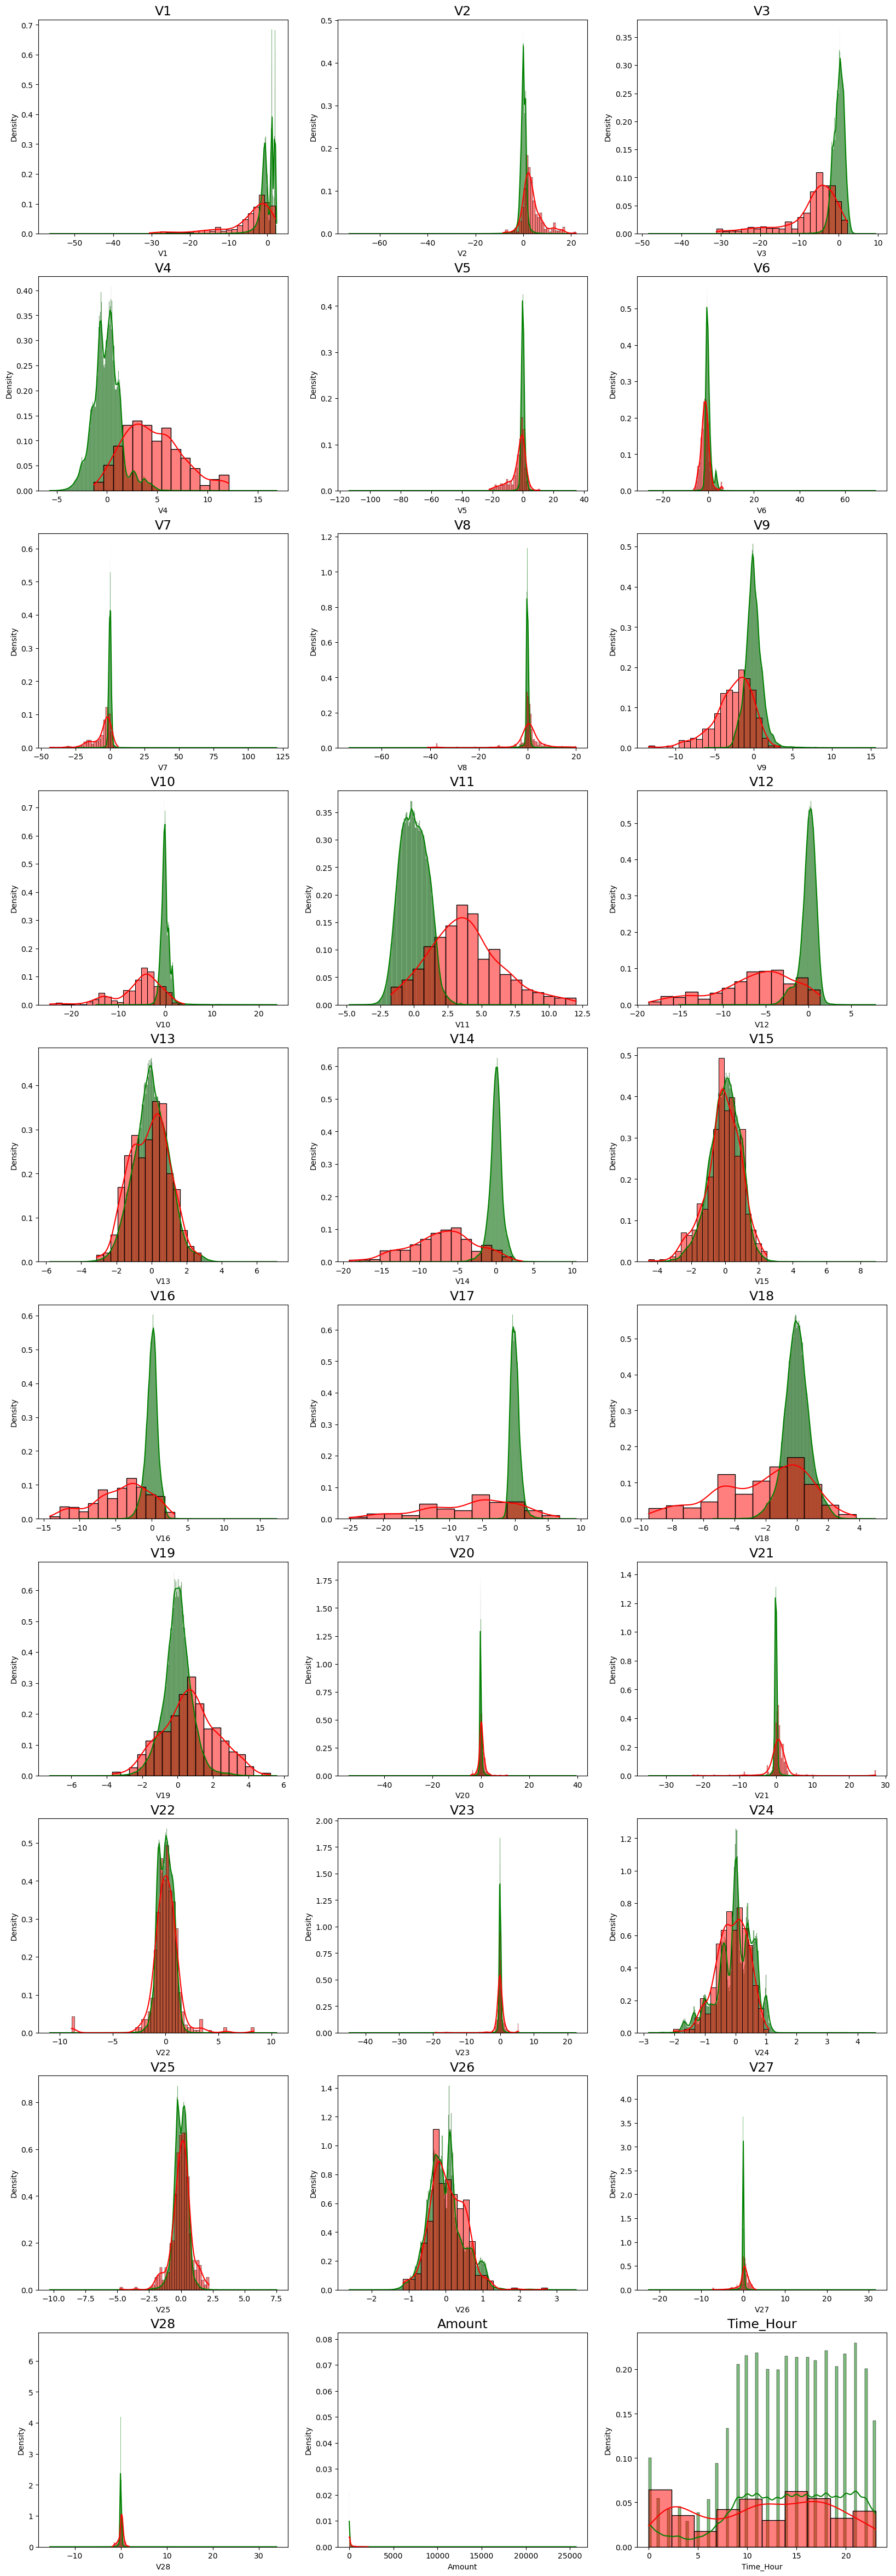

In [14]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

# Plot the histogram of a variable from the dataset to see the skewness
normal_records = df2.Class == 0
fraud_records = df2.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(X[col][normal_records], color='green', kde=True, stat='density', label='Normal')
    sns.histplot(X[col][fraud_records], color='red', kde=True, stat='density', label='Fraud')
    plt.title(col, fontsize=17)
plt.show()

## Model Building
- Confusion Matrix
- Classification Report: Precision, Recall, F1 Score, etc.
- Area Under the Curve (AUC) of Receiver Operating Characteristic (ROC)
    - the higher AUC, the better the performanace of the model at distinguishing between the positive and negative classes.

https://scikit-learn.org/stable/

In [15]:
# Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'roc_value', 'threshold'])

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
# Create a common function to plot 'Confusion Matrix'
def Plot_Confusion_Matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudalent', 'Fraudalent']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    # print the value
    for i in range(2): 
        for j in range(2):
            plt.text(j,o, str(s[i][j])+' = '+str(cm[i][j]),frontsize=12)
    plt.show()

### 1. Logistic Regression
- Create a common function to fit and predict on a Logistic Regression model for both: `L1` and `L2`

In [17]:
def LogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # import LOgistic Regression
    from sklearn import linear_model
    
    # K-Fold cross-validator
    from sklearn.model_selection import KFold
    num_C = list(np.power(10.0, np.arange(-10,10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=seed)
    ## L2
    searchCV_L2 = linear_model.LogisticRegressionCV(
            Cs= num_C,
            penalty= 'l2',
            scoring= 'roc_auc',
            cv= cv_num,
            random_state=seed,
            max_inter=10000,
            fit_intercept=True,
            solver='newton-cg',
            tol=10)
    ## L1
    searchCV_L1 = linear_model.LogisticRegressionCV(
            Cs= num_C,
            penalty= 'l1',
            scoring= 'roc_auc',
            cv= cv_num,
            random_state=seed,
            max_inter=10000,
            fit_intercept=True,
            solver='newton-cg',
            tol=10)
    # Fit the models
    searchCV_L2.fit(X_train, y_train) # L2
    searchCV_L1.fit(Xtrain, y_train) # L1
    
    # Max AUC_ROC
    print('Max AUC_ROC for L2:', searchCV_L2.scores_[1].mean(axis=0).max())
    print('Max AUC_ROC for L1:', searchCV_L1.scores_[1].mean(axis=0).max())
    
    # Parameters for L2 Regularization
    print('\nParameters for L2 Regularization:')
    print(searchCV_L2.coef_)
    print(searchCV_L2.intercept_)
    print(searchCV_L2.scores_)
    # Parameters for L1 Regularization
    print('\nParameters for L1 Regularization:')
    print(searchCV_L1.coef_)
    print(searchCV_L1.intercept_)
    print(searchCV_L1.scores_)
    
    # Predicted values
    y_pred_L2 = searchCV_L2.predict(X_test)
    y_pred_L1 = searchCV_L1.predict(X_test)
    
    # Predicted Probabilities
    y_pred_prob_L2 = searchCV_L2.predict_proba(X_test)[:,1]
    y_pred_prob_L1 = searchCV_L1.predict_proba(X_test)[:,1]
    
    # Accuracy of L2 and L1 models
    from sklearn.metrics import accuracy_score
    Accuracy_L2 = metrics.accuracy_score(y_pred=y_pred_L2, y_true=y_test)
    ## L2
    print('\nAccuracy of Logistic model with L2 Regularization: {0}'.format(Accuracy_L2))
    print('Confusion Matrix') 
    Plot_Confusion_Matrix(y_test, y_pred_L2)
    
    from sklearn.metrics import classification_report
    print('Classification Report')
    print(classification_report(y_test, y_pred_L2))
    
    ## L1
    Accuracy_L1 = metrics.accuracy_score(y_pred=y_pred_L1, y_true=y_test)
    print('\nAccuracy of Logistic model with L1 Regularization: {0}'.format(Accuracy_L1))
    print('Confusion Matrix') 
    Plot_Confusion_Matrix(y_test, y_pred_L1)
    
    from sklearn.metrics import classification_report
    print('Classification Report')
    print(classification_report(y_test, y_pred_L1))
    
    # L2 ROC Value
    from sklearn.metrics import roc_auc_score
    L2_ROC_value = roc_auc_score(y_test, y_pred_prob_L2)
    from sklearn.metrics import roc_curve
    print(f'\nL2 ROC value: {L2_ROC_value}')
    FPR, TPR, thresholds = metrics.roc_curve(y_test, y_pred_prob_L2)
    threshold = thresholds[np.argmax(TPR-FPR)]
    print(f'L2 threshold: {threshold}')
    
    from sklearn.metrics import auc
    ROC_AUC = metrics.auc(FPR, TPR)
    print(f'ROC for the test dataset {ROC_AUC}')
    plt.plot(FPR, TPR, label='Test, AUC='+str(ROC_AUC))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'Logistic Regression with L2 Regularization',
                                                'Accuracy':Accuracy_L2,
                                                'roc_value':L2_ROC_value,
                                                'threshold':threshold}))
    
    # L1 ROC Value
    from sklearn.metrics import roc_auc_score
    L1_ROC_value = roc_auc_score(y_test, y_pred_prob_L1)
    from sklearn.metrics import roc_curve
    print(f'\nL1 ROC value: {L1_ROC_value}')
    FPR, TPR, thresholds = metrics.roc_curve(y_test, y_pred_prob_L1)
    threshold = thresholds[np.argmax(TPR-FPR)]
    print(f'L1 threshold: {threshold}')
    
    from sklearn.metrics import auc
    ROC_AUC = metrics.auc(FPR, TPR)
    print(f'ROC for the test dataset {ROC_AUC}')
    plt.plot(FPR, TPR, label='Test, AUC='+str(ROC_AUC))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,
                                                'Model':'Logistic Regression with L1 Regularization',
                                                'Accuracy':Accuracy_L1,
                                                'roc_value':L1_ROC_value,
                                                'threshold':threshold}))
    return df_Results

### 2. K-Nearest Neighbour (KNN)
- The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

In [19]:
def KNN_Models(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # create KNN model and fit the model with training dataset
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_test)
    score = knn.score(X_test, y_test)
    print('Model score:')
    print(score)
    
    # Accuracy
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print('Confusion Matrix')
    Plot_Confusion_Matrix(y_test, y_pred)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    knn_probs = knn.predict_proba(X_test)[:,1]

### 3. Decision Tree Classifier

### 4. Random Forest

### 5. XGBoost

### 6. Support Vector Machine (SVM)
- Plot each data item as a point in n-dimensional space (where n is a number of features we have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.
